In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math

#SVM with 2 input features#

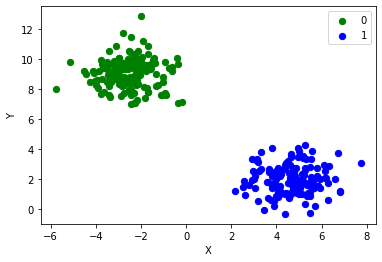

In [2]:
#let's create a simple linearly separable dataset (execute this cell till one is found)
from sklearn.datasets import make_blobs
n_classes = 2
data, labels = make_blobs(n_samples=300, centers=n_classes, random_state=42)
# some blobs
fig, ax = plt.subplots()

colours = ('green','blue')
for label in range(n_classes):
    ax.scatter(x=data[labels==label, 0], 
               y=data[labels==label, 1], 
               c=colours[label], 
               s=40, 
               label=label)

ax.set(xlabel='X',
       ylabel='Y')


ax.legend(loc='upper right')

In [3]:
#SVM works with labels y = {-1,1}, therefore we substitute 0 with -1
from sklearn import preprocessing
X = data
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)
Y = labels
Y = np.where(Y == 0, -1, Y)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = .8)
print('N. samples in train', len(X_train))
print('N. samples in test', len(X_test))

N. samples in train 240
N. samples in test 60


In [8]:
def get_prediction(y_pred,predictions):
  for y_i in y_pred:
    if y_i > 1: predictions.append(1)
    else:predictions.append(-1)
  return np.array(predictions).reshape(y_pred.shape[0],1)

def GD(X, y, lr,n_epochs):
  n_samples, n_inputs = X.shape
  n_classes = 1
  #weights initialization 
  #w1 for x1 and w2 for x2
  w1 = np.zeros((n_samples, 1))
  w2 = np.zeros((n_samples, 1))
  bias = 0
  y = np.expand_dims(y,1)
  for t in range(n_epochs):
    t+=1
    predictions = []
    correct_preds = 0
    sum_loss = 0
    #each w1 is multiplied for x1 and the same for w2 and x2 (element wise multiplication)
    x1 = X[:,:-1]
    x2 = X[:,-1].reshape(X_train.shape[0],1)
    y_pred = bias+w1*x1+w2*x2 
    predictions = get_prediction(y_pred,predictions)
    output = y*y_pred

    count = 0
    for value in output:
      #If the output is greater than 1, it means that the training istance is correctly classified
      #in this case we need only to update the gradient from the regularization parameter --> (1/t)
      if value >= 1:
        loss = 0
        #t = current epoch, 1/t is considered the regulation parameter --> (1/t)
        w1 = w1-lr*(2*(1/t)*w1)
        w2 = w2-lr*(2*(1/t)*w2)
        b=0
      #if the value is less than 1, it means that a missclassification of the training data has occurred.
      #in this case the loss along with the regularization parameter to perform gradient update is included
      else:
        #the loss is the so called 'hinge loss', it is computed as c=1-y_i*(np.dot(X_i,weights)) 
        loss = 1-value[0]
        w1 = w1+lr*(x1[count]*y[count] - 2*(1/t)*w1)
        w2 = w2+lr*(x2[count]*y[count] - 2*(1/t)*w2)
        bias = bias+lr*y[count]
      count+=1
      sum_loss+=loss
    correct_preds = np.sum(np.array(predictions)==y)
    #print(correct_preds)
    
  print(f'Epoch {t}, loss: {sum_loss/X.shape[0]}, epoch accuracy: {correct_preds/float(len(y))}')
  return w1,w2,bias

n_epochs = 10000
lr = 0.001
w1,w2,bias = GD(X_train, y_train, lr, n_epochs)

Epoch 10000, loss: 0.00022087188752023258, epoch accuracy: 0.9958333333333333


In [9]:
#Clip the weights
index = list(range(X_test.shape[0],X_train.shape[0]))
w1 = np.delete(w1,index)
w2 = np.delete(w2,index)
w1 = w1.reshape(X_test.shape[0],1)
w2 = w2.reshape(X_test.shape[0],1)

**Test Phase**

In [10]:
y_test = y_test.reshape(y_test.shape[0],1)
preds_plt = []
test_predictions = []
correct_test_preds = 0
x1_test = X_test[:,:-1]
x2_test = X_test[:,-1].reshape(-1,1)
y_pred = bias + w1*x1_test+w2*x2_test
test_predictions = get_prediction(y_pred,test_predictions)
correct_test_preds = np.sum(test_predictions==y_test)
print(f'Test accuracy: {correct_test_preds/float(len(y_test))}')

Test accuracy: 1.0


margin 0.18657655401377407


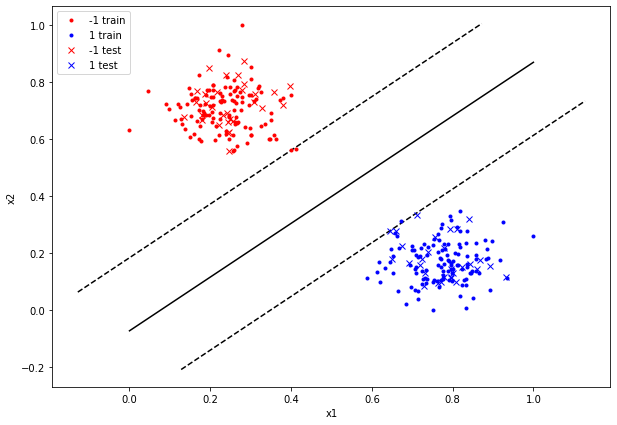

In [11]:
def compute_boundary(w1,w2):
  #boundary 
  m = -(w1[0]/w2[0])
  return m

def get_x1_x2(X_data,y_data):
  class_1x1 = []
  class_1x2 = []
  class1x1 = []
  class1x2 = []
  classy_1 = []
  classy1 = []
  for x_i,y_i in zip(X_data,y_data):
    x1 = x_i[0]
    x2 = x_i[1]
    if y_i == -1:
      class_1x1.append(x1)
      class_1x2.append(x2)
      classy_1.append(y_i)

    else:
      class1x1.append(x1)
      class1x2.append(x2)
      classy1.append(y_i)
  return class_1x1,class_1x2,class1x1,class1x2,classy_1,classy1

class_1x1_train,class_1x2_train,class1x1_train,class1x2_train,classy_1_train,classy1_train = get_x1_x2(X_train,y_train)
class_1x1_test,class_1x2_test,class1x1_test,class1x2_test,classy_1_test,classy1_test = get_x1_x2(X_test,y_test)

weights = np.array([w1[0][0],w2[0][0]])
plt.figure(figsize=(10,7))
m = compute_boundary(w1,w2)
#compute margins 
margin = 1/np.sqrt(np.sum(weights**2))
print('margin', margin)
xx = np.linspace(0, 1) 
yy = m*xx-bias/w2[0]
w_hat = weights/np.sqrt(np.sum(weights**2))
db_p = np.array(list(zip(xx, yy)))
margin_down = db_p-w_hat*margin
margin_up = db_p+w_hat*margin

plt.plot(xx, yy, "k-")
plt.plot(margin_down[:,0],margin_down[:,1], "--", c='black')
plt.plot(margin_up[:,0],margin_up[:,1], "--", c='black')

plt.plot(class_1x1_train, class_1x2_train, '.', label='-1 train', c='r')
plt.plot(class1x1_train, class1x2_train, '.', label='1 train', c='b')

plt.plot(class_1x1_test, class_1x2_test, 'x', label='-1 test', c='r')
plt.plot(class1x1_test, class1x2_test, 'x', label='1 test', c='b')

plt.legend(loc="upper left")
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

#SVM (from sklearn) with 2 input features and different Kernels#

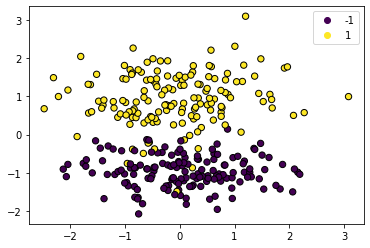

In [31]:
from sklearn.datasets import make_classification
n_classes = 2
X1, y1 = make_classification(
    n_samples=300, 
    n_features=2, 
    n_redundant=0,
    n_informative=1,
    n_clusters_per_class=1,
    n_classes=n_classes,
    random_state=42
)

fig, ax = plt.subplots()

scatt = plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=y1, s=40, edgecolor="k")
plt.legend(handles=scatt.legend_elements()[0], labels=[-1,1])

In [32]:
#SVM works with labels y = {-1,1}, therefore we substitute 0 with -1
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X1 = min_max_scaler.fit_transform(X1)
Y1 = np.where(y1 == 0, -1, y1)

In [33]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, train_size = .8)
print('N. samples in train', len(X_train1))
print('N. samples in test', len(X_test1))

N. samples in train 240
N. samples in test 60


confusion matrix of SMV with linear kernel 
 [[27  1]
 [ 1 31]]
classification_report SVM with linear kernel 
               precision    recall  f1-score   support

          -1       0.96      0.96      0.96        28
           1       0.97      0.97      0.97        32

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60





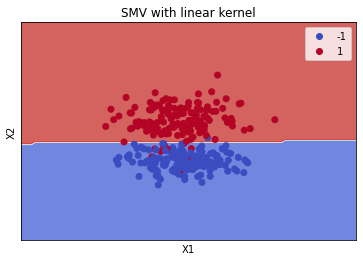



confusion matrix of SMV with poly kernel 
 [[27  1]
 [ 1 31]]
classification_report SVM with poly kernel 
               precision    recall  f1-score   support

          -1       0.96      0.96      0.96        28
           1       0.97      0.97      0.97        32

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60





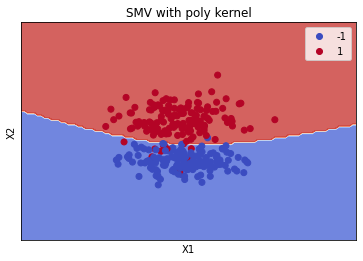



confusion matrix of SMV with rbf kernel 
 [[27  1]
 [ 1 31]]
classification_report SVM with rbf kernel 
               precision    recall  f1-score   support

          -1       0.96      0.96      0.96        28
           1       0.97      0.97      0.97        32

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60





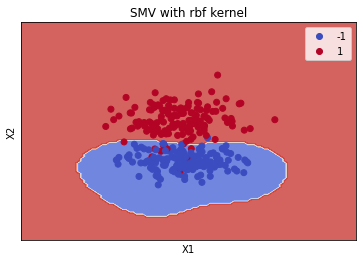



confusion matrix of SMV with sigmoid kernel 
 [[13 15]
 [25  7]]
classification_report SVM with sigmoid kernel 
               precision    recall  f1-score   support

          -1       0.34      0.46      0.39        28
           1       0.32      0.22      0.26        32

    accuracy                           0.33        60
   macro avg       0.33      0.34      0.33        60
weighted avg       0.33      0.33      0.32        60





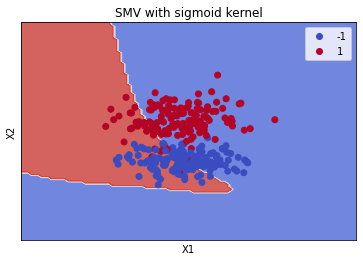

In [34]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
#kernel trick is used when data are not linearly separable.
#the idea is to move from the original space to an higher dimensional feature space to make the data linearly separable. 
#the decision boundary are hyperplanes

def plot_boundary(X,y,svc,kernel):
  # create a mesh to plot in
  h = .02
  x_min, x_max = X1[:, 0].min()-0.5, X1[:, 0].max()+0.5
  y_min, y_max = X1[:, 1].min()-0.5, X1[:, 1].max()+0.5
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
  np.arange(y_min, y_max, h))

  z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
  z = z.reshape(xx.shape)
  plt.contourf(xx, yy, z, cmap=plt.cm.coolwarm, alpha=0.8)

  # Plot also the training points
  scatt = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
  plt.legend(handles=scatt.legend_elements()[0], labels=[-1,1])
  plt.xlabel('X1')
  plt.ylabel('X2')
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.xticks(())
  plt.yticks(())
  plt.title('SMV with '+ kernel+' kernel')
  plt.show()

#the kernel used are: 
# - linear = classic linear kernel used above
# - poly = polynomial kerneal
# - rbf = gaussian Kernel
# - sigmoid = sigmoid kerneal
kernels = ['linear','poly','rbf','sigmoid']
for kernel in kernels:
  if kernel == 'poly':
    # C is the svm regularization parameter
    svc = SVC(kernel=kernel,degree=3,C=1)
  else:
    svc = SVC(kernel=kernel,C=1)
  #training
  svc.fit(X_train1, y_train1)

  #compute predictions
  y_pred = svc.predict(X_test1)
  print(f'confusion matrix of SMV with {kernel} kernel \n', confusion_matrix(y_test1, y_pred))
  print(f'classification_report SVM with {kernel} kernel \n' , classification_report(y_test1, y_pred))
  print('\n')

  #plot
  plot_boundary(X1,y1,svc,kernel)
  print('\n')